**Этот ноутбук — упражнение из курса [Intro to Deep Learning](https://www.kaggle.com/learn/intro-to-deep-learning). Вы можете обратиться к учебному материалу по [этой ссылке](https://www.kaggle.com/ryanholbrook/binary-classification).**

# Введение #

В этом упражнении вы построите модель для прогнозирования отмен бронирований отелей с помощью бинарного классификатора.

In [1]:
# Setup plotting
import matplotlib.pyplot as plt

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

Сначала загрузите набор данных *Hotel Cancellations*.

In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

hotel = pd.read_csv('../dataset/hotel.csv')

X = hotel.copy()
y = X.pop('is_canceled')

X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

# 1) Определите модель #

Модель, которую мы будем использовать в этот раз, будет включать и слой пакетной нормализации, и слой dropout. Чтобы упростить чтение, мы разбили диаграмму на блоки, но вы можете определить модель слой за слоем, как обычно.

Определите модель с архитектурой, показанной на этой диаграмме:

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/V04o59Z.png" width="400" alt="Диаграмма архитектуры сети: BatchNorm, Dense, BatchNorm, Dropout, Dense, BatchNorm, Dropout, Dense.">
<figcaption style="textalign: center; font-style: italic"><center>Диаграмма бинарного классификатора.</center></figcaption>
</figure>

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE: define the model given in the diagram
model = keras.Sequential([
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')
])

# 2) Добавьте оптимизатор, функцию потерь и метрику #

Теперь скомпилируйте модель с оптимизатором Adam и бинарными версиями кросс-энтропии и метрики точности.

In [5]:
# YOUR CODE HERE
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [ ]:
# Lines below will give you a hint or solution code
#q_2.hint()
#q_2.solution()

Наконец, запустите эту ячейку, чтобы обучить модель и посмотреть кривые обучения. Обучение может занять около 60–70 эпох, что может занять минуту или две.

Epoch 1/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.7430 - loss: 0.5250 - val_binary_accuracy: 0.7847 - val_loss: 0.4510
Epoch 2/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.8052 - loss: 0.4191 - val_binary_accuracy: 0.8120 - val_loss: 0.4022
Epoch 3/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.8108 - loss: 0.4055 - val_binary_accuracy: 0.8151 - val_loss: 0.3929
Epoch 4/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.8141 - loss: 0.3960 - val_binary_accuracy: 0.8197 - val_loss: 0.3871
Epoch 5/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.8191 - loss: 0.3855 - val_binary_accuracy: 0.8214 - val_loss: 0.3828
Epoch 6/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - binary_accuracy: 0.8202 - loss: 0.3875 - val_binary_accuracy: 0.8227 - val_loss: 0.3799
Epoch 7/200
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.8232 - loss: 0.3813 - val_binary_accuracy: 0.8247 - val_loss: 0.3770

<Axes: title={'center': 'Accuracy'}>

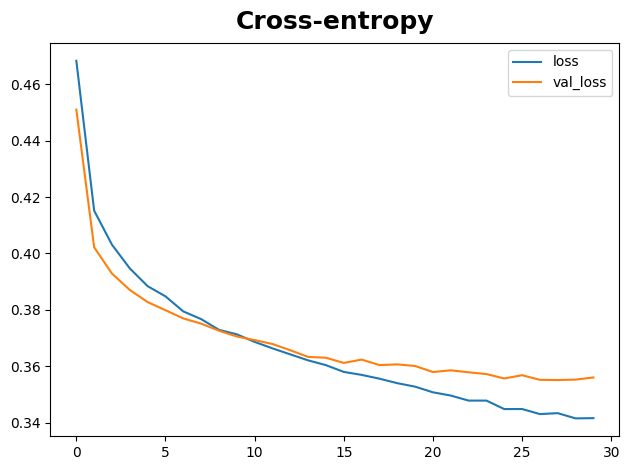

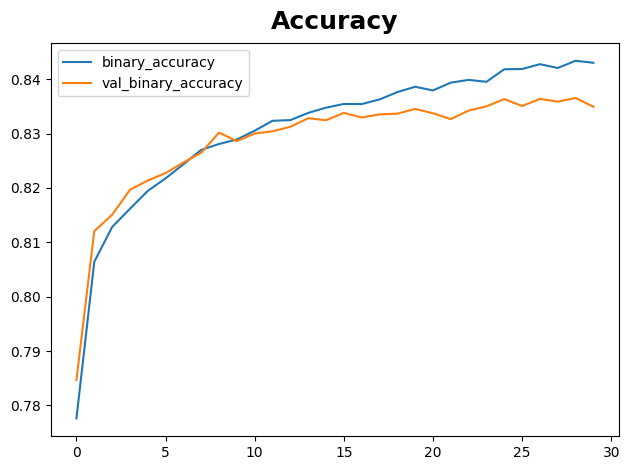

In [6]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

# 3) Обучение и оценка #


Что вы думаете о кривых обучения? Похоже, модель недообучена или переобучена? Была ли кросс-энтропия хорошей заменой точности?

# Заключение #

Поздравляем! Вы завершили курс Kaggle *Introduction to Deep Learning*!

С новыми навыками вы готовы перейти к более продвинутым задачам, таким как компьютерное зрение и анализ тональности. Что бы вы хотели сделать дальше?

Почему бы не попробовать одно из наших соревнований *Getting Started*?

- Классифицируйте изображения с помощью TPU в [**Petals to the Metal**](https://www.kaggle.com/c/tpu-getting-started)
- Создавайте искусство с GAN в [**I'm Something of a Painter Myself**](https://www.kaggle.com/c/gan-getting-started)
- Классифицируйте твиты в [**Real or Not? NLP with Disaster Tweets**](https://www.kaggle.com/c/nlp-getting-started)
- Определяйте противоречие и следование в [**Contradictory, My Dear Watson**](https://www.kaggle.com/c/contradictory-my-dear-watson)

До встречи, Kagglers!

---



*Есть вопросы или комментарии? Посетите [форум обсуждений курса](https://www.kaggle.com/learn/intro-to-deep-learning/discussion), чтобы пообщаться с другими учащимися.*